In [ ]:
#Use the tensorflow [version 1]
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
#Read all [41 users' oversampled data]
import csv
import pandas as pd
with open('Data/AllOversampledNTData.csv') as csvfile:
    dataSet = list(csv.reader(csvfile, delimiter=','))
dfdataSet = pd.DataFrame(dataSet[0:][:])
dfdataSet.columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','ID']
print('Done..')

Done..


In [ ]:
#Add all data to [a dataframe] and reset users' id from [0 to 40]
import numpy as np
import random
from sklearn.utils import shuffle
columnsN=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','ID']
columnsF=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30']

fdataSet = pd.DataFrame(columns = columnsN)

#print(fdataSet)
for i in range (0,41):
  #fdataSet=fdataSet.append(shuffle(dfdataSet[1000*(i-1):i*1000]),ignore_index = True)
  fdataSet=fdataSet.append(dfdataSet[2000*i+1:(i+1)*2000+1])

fDataSet=fdataSet.drop(columns=['ID'])
#fDataSet=standardize(fDataSet,columns=columnsF)

fIDSet = pd.DataFrame(columns = ['ID'])
fIDSet=fdataSet['ID']
for i in range (0,41):
  fIDSet[2000*i:(i+1)*2000]=i

#fDataSet['ID'] = fIDSet

In [ ]:
#Seperate the data in [two groups]
#Then divided them to tranning set, validation set and test set for all 40 users
import numpy as np
from numpy import array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X1=fDataSet[:39999]
y1=fIDSet[:39999]
X2=fDataSet[40000:79999]
y2=fIDSet[40000:79999]
y2=y2-20

#print(y1.shape)
#print(X2)
#print(y2)

#Divide first 97 uses data in tranning set, validation set and test set for 97 users
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=22,stratify=y1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=22)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.2, random_state=22)

y1T=y1_train
y1V=y1_val
y1Te=y1_test

y1_train = to_categorical(y1_train)
y1_val = to_categorical(y1_val)
y1_test = to_categorical(y1_test)

#Divide next 97 uses data in tranning set, validation set and test set for 97 users
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=22,stratify=y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=22)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.2, random_state=22)

y2T=y2_train
y2V=y2_val
y2Te=y2_test

y2_train = to_categorical(y2_train)
y2_val = to_categorical(y2_val)
y2_test = to_categorical(y2_test)

Using TensorFlow backend.


In [ ]:
print(array(y1_train)[7])
print(array(y2_train)[7])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#print(array(y1_train)[7])
#print(array(y2_train)[7])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Print the [shape] of tranning, test and validation set
print(X2_train.shape)
print(X2_val.shape)
print(X2_test.shape)

(25599, 30)
(6400, 30)
(8000, 30)


In [ ]:
#import all necessary [packages]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import torch.nn.functional as F

In [ ]:
#define all required [optimizers]
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(lr=0.001, rho=0.9)

In [ ]:
#Construct a [classifier]
def create_classifier(release=False,Tuser=41):
  classifier = Sequential()
  classifier.add(Dense(64, input_dim=30))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  #classifier.add(Dense(512))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('tanh'))

  #classifier.add(Dense(512))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('tanh'))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  classifier.add(Dense(64))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  #if release:
  classifier.add(Dense(Tuser, activation='softmax'))
  #else:
  #   classifier.add(Dense(Tuser))
  
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  classifier.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  return classifier

Clasf=create_classifier()
Clasf.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1984      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_______________________________________

In [ ]:
# [Train the classifier] by first group of users
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier2= create_classifier(True,20)

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(lr=0.001, rho=0.9)
Classfier2.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc2 =  Classfier2.fit(X1_train, y1_train, batch_size=64, epochs=50, validation_data=(X1_val, y1_val),verbose=1, callbacks=callbacks_list)


Train on 25599 samples, validate on 6400 samples
Epoch 1/50
25599/25599 [==============================] - 3s 121us/step - loss: 1.0398 - accuracy: 0.6940 - val_loss: 1.5078 - val_accuracy: 0.4916
Epoch 2/50
 2112/25599 [=>............................] - ETA: 1s - loss: 0.6709 - accuracy: 0.7798

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


25599/25599 [==============================] - 2s 84us/step - loss: 0.6059 - accuracy: 0.8052 - val_loss: 0.6100 - val_accuracy: 0.7987
Epoch 3/50
25599/25599 [==============================] - 2s 86us/step - loss: 0.4961 - accuracy: 0.8381 - val_loss: 0.7110 - val_accuracy: 0.7747
Epoch 4/50
25599/25599 [==============================] - 2s 85us/step - loss: 0.4262 - accuracy: 0.8577 - val_loss: 0.5881 - val_accuracy: 0.8191
Epoch 5/50
25599/25599 [==============================] - 2s 85us/step - loss: 0.3861 - accuracy: 0.8704 - val_loss: 0.4614 - val_accuracy: 0.8425
Epoch 6/50
25599/25599 [==============================] - 2s 85us/step - loss: 0.3488 - accuracy: 0.8836 - val_loss: 0.4624 - val_accuracy: 0.8450
Epoch 7/50
25599/25599 [==============================] - 2s 84us/step - loss: 0.3267 - accuracy: 0.8910 - val_loss: 0.4718 - val_accuracy: 0.8495
Epoch 8/50
25599/25599 [==============================] - 2s 85us/step - loss: 0.3027 - accuracy: 0.9004 - val_loss: 0.4523 - val

Text(0.5, 0, 'epochs')

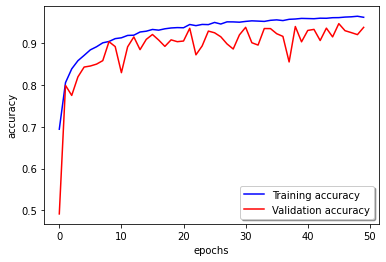

In [ ]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [ ]:
#[Performance] of the classifier for first user group
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(X1_train, y1_train)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

25599/25599 [==============================] - 1s 51us/step
Loss: 0.1187666133877097
Accuracy: 0.9568732976913452


In [ ]:
#[Performance] of the classifier for first user group
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(X2_train, y2_train)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

25599/25599 [==============================] - 1s 53us/step
Loss: 19.7914280039225
Accuracy: 0.01824289932847023


In [ ]:
#Related to neighbor class estimation of non-zero probability class[Actual data]
#Take only [top-ranked probability class index]
import numpy as np
rank=5
X11_train=Classfier2.predict(X1_train)
X11_test=Classfier2.predict(X1_test)
n1,m1=X11_train.shape
n2,m2=X11_test.shape

y11_train = np.zeros([n1,5], dtype=float)
y11_test = np.zeros([n2], dtype=float)


for i in range(n1):
  ind=X11_train[i].argsort()[-rank:][::-1]
  y11_train[i][0]=ind[0]

for i in range(n2):
  ind=X11_test[i].argsort()[-rank:][::-1]
  y11_test[i]=ind[0]

In [ ]:
#Related to neighbor class estimation of non-zero probability class [Actual data]
from sklearn.random_projection import SparseRandomProjection
from scipy.spatial import distance
import numpy

n1,m1=X1_train.shape
n2,m2=X1_test.shape


y1T=array(y1T)
y1Te=array(y1Te)
X1_train=array(X1_train)
X1_test=array(X1_test)
kNN=2000
count=0;

#indx=2
sum=numpy.zeros(20)
allSort1=numpy.zeros((n1,20))

#distance.euclidean(X2_train[1].values, X2_test[1].values)
#print('Hello')
#with open('Data/allDistanceT.csv') as csvfile:
#    d = list(csv.reader(csvfile, delimiter=','))

for indx in range(n1):
  d=numpy.zeros(n2)
  for j in range(n2):
    #d[j] = distance.euclidean(encoded_train[j], encoded_test[indx])
    d[j] = distance.euclidean(X1_train[indx].astype(float), X1_test[j].astype(float))

  ind=d.argsort()

  #classID=23
  allSum=0
  for classID in range(20): 
    sum1=0
    sum2=0
    k=0
    l=0
    while(k<kNN):
    #print(encoded_test[i])
      if(y11_test[ind[l]]==classID and y11_test[ind[l]]!=y11_train[indx][0]):
        #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
        d1 = d[ind[l]]
        #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
        sum1=sum1+np.exp(-d1)
        k=k+1
        l=l+1
      elif(y11_test[ind[l]]!=y11_train[indx][0]) :
        #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
        d2 = d[ind[l]]
        #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
        sum2=sum2+np.exp(-d2)
        k=k+1
        l=l+1
      else:
        l=l+1

    if(classID!=y11_train[indx][0]):
      sum[classID]=sum1/(sum1+sum2)
    else:
     sum[classID]=-1
 
  #allSum=allSum+(sum1/(sum1+sum2))
  sumsort=sum.argsort()
  allSort1[indx]=sumsort
  #print(sumsort)
  
  if(y11_train[indx][0]==sumsort[19]):
     count=count+1;
 #print(y2Te[indx])
 #print(count)

print((count/1000)*100)

0.0


In [ ]:
#[Actual data]: Comparison the output of NN and k-NN
X11_train=Classfier2.predict(X1_train)
n1,m1=X11_train.shape
rank=20
orgNeighbor=np.zeros([n1,20], dtype=float)
predNeighbor=np.zeros([n1,20], dtype=float)

orgNeighbor1=np.zeros([n1,5], dtype=float)
predNeighbor1=np.zeros([n1,5], dtype=float)

orgNeighbor2=np.zeros([n1,10], dtype=float)
predNeighbor2=np.zeros([n1,10], dtype=float)

predNeighbor=allSort1
for i in range(n1):
  orgNeighbor[i]=X11_train[i].argsort()[-rank:][::-1]

for i in range(n1):
   for j in range(1,6):
    orgNeighbor1[i][j-1]=orgNeighbor[i][j]
    predNeighbor1[i][j-1]=predNeighbor[i][20-j] 

for i in range(n1):
   for j in range(1,11):
    orgNeighbor2[i][j-1]=orgNeighbor[i][j]
    predNeighbor2[i][j-1]=predNeighbor[i][20-j] 

#print(orgNeighbor[0:1])
#print(predNeighbor[0:1])

In [ ]:
#[Actual data]: Comparison the output of NN and k-NN
commonSize1=np.zeros(n1)
commonSize2=np.zeros(n1)

for i in range(n1):
  orgNeighborSet1=set(orgNeighbor1[i])
  predNeighborSet1=set(predNeighbor1[i])
  common1 = orgNeighborSet1.intersection(predNeighborSet1)
  commonSize1[i]=len(common1)

  orgNeighborSet2=set(orgNeighbor2[i])
  predNeighborSet2=set(predNeighbor2[i])
  common2 = orgNeighborSet2.intersection(predNeighborSet2)
  commonSize2[i]=len(common2)

#print(commonSize)

In [ ]:
print(orgNeighbor1[3])
print(predNeighbor1[3])

[ 9.  2. 18. 15.  5.]
[ 2. 18.  7.  5. 11.]


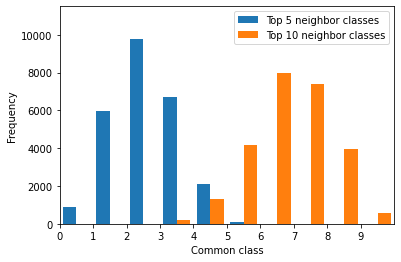

In [ ]:
#[Actual data]: Comparison the output of NN and k-NN
import matplotlib.pyplot as plt
X=np.arange(0, n1, 1).tolist()
xlocs, xlabs = plt.xticks()
xlabs=[i for i in range(0,10)]
x_pos = [i for i, _ in enumerate(xlabs)] 
Y1=commonSize1
Y2=commonSize2
plt.hist([Y1,Y2])
plt.legend(['Top 5 neighbor classes','Top 10 neighbor classes'])
plt.ylabel('Frequency')
plt.xlabel('Common class')
plt.xlim(0,10)
plt.ylim(0,11500)
plt.xticks(x_pos, xlabs)
#legend = plt.legend(loc='best', shadow=True)
plt.show()

In [ ]:
#Related to neighbor class estimation of non-zero probability class[For auxilary data]
#Input the data of [second users' group] to the classifier
#Take only [top-ranked probability class index]
import numpy as np
rank=5
X22_train=Classfier2.predict(X2_train)
X22_test=Classfier2.predict(X2_test)
n1,m1=X22_train.shape
n2,m2=X22_test.shape

y22_train = np.zeros([n1,5], dtype=float)
y22_test = np.zeros([n2], dtype=float)


for i in range(n1):
  ind=X22_train[i].argsort()[-rank:][::-1]
  y22_train[i][0]=ind[0]

for i in range(n2):
  ind=X22_test[i].argsort()[-rank:][::-1]
  y22_test[i]=ind[0]

In [ ]:
#Related to neighbor class estimation of non-zero probability class [For auxilary data]
#Based on top-ranked probability value [group all test data in different classes]
#Based on test data class and top-ranked probablity class of tranning sample
#calculate neighbor of top-ranked probablity class by using Euclidean distance based approach
from sklearn.random_projection import SparseRandomProjection
from scipy.spatial import distance
import numpy

n1,m1=X2_train.shape
n2,m2=X2_test.shape


y2T=array(y2T)
y2Te=array(y2Te)
X2_train=array(X2_train)
X2_test=array(X2_test)
kNN=10
count=0;

#indx=2
sum=numpy.zeros(20)
allSort2=numpy.zeros((n1,20))

#distance.euclidean(X2_train[1].values, X2_test[1].values)
#print('Hello')
#with open('Data/allDistanceT.csv') as csvfile:
#    d = list(csv.reader(csvfile, delimiter=','))

for indx in range(n1):
  d=numpy.zeros(n2)
  for j in range(n2):
    #d[j] = distance.euclidean(encoded_train[j], encoded_test[indx])
    d[j] = distance.euclidean(X2_train[indx].astype(float), X2_test[j].astype(float))

  ind=d.argsort()

  #classID=23
  allSum=0
  for classID in range(20): 
    sum1=0
    sum2=0
    k=0
    l=0
    while(k<kNN):
    #print(encoded_test[i])
      if(y22_test[ind[l]]==classID and y22_test[ind[l]]!=y22_train[indx][0]):
        #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
        d1 = d[ind[l]]
        #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
        sum1=sum1+np.exp(-d1)
        k=k+1
        l=l+1
      elif(y22_test[ind[l]]!=y22_train[indx][0]) :
        #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
        d2 = d[ind[l]]
        #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
        sum2=sum2+np.exp(-d2)
        k=k+1
        l=l+1
      else:
        l=l+1

    if(classID!=y22_train[indx][0]):
      sum[classID]=sum1/(sum1+sum2)
    else:
     sum[classID]=-1
 
  #allSum=allSum+(sum1/(sum1+sum2))
  sumsort=sum.argsort()
  allSort2[indx]=sumsort
  #print(sumsort)
  
  if(y22_train[indx][0]==sumsort[19]):
     count=count+1;
 #print(y2Te[indx])
 #print(count)

print((count/1000)*100)

In [ ]:
#Related to neighbor class estimation of non-zero probability class [For auxilary data and Random projection]
#Based on top-ranked probability value [group all test data in different classes]
#Based on test data class and top-ranked probablity class of tranning sample
#calculate neighbor of top-ranked probablity class by using Euclidean distance based approach
from sklearn.random_projection import SparseRandomProjection
from scipy.spatial import distance
import numpy

sp = SparseRandomProjection(26)
X22_train = sp.fit_transform(X2_train)
X22_test = sp.fit_transform(X2_test)

n1,m1=X22_train.shape
n2,m2=X22_test.shape


y2T=array(y2T)
y2Te=array(y2Te)
X22_train=array(X22_train)
X22_test=array(X22_test)
kNN=10
count=0;

#indx=2
sum=numpy.zeros(20)
allSort2=numpy.zeros((n1,20))

#distance.euclidean(X2_train[1].values, X2_test[1].values)
#print('Hello')
#with open('Data/allDistanceT.csv') as csvfile:
#    d = list(csv.reader(csvfile, delimiter=','))

for indx in range(n1):
  d=numpy.zeros(n2)
  for j in range(n2):
    #d[j] = distance.euclidean(encoded_train[j], encoded_test[indx])
    d[j] = distance.euclidean(X22_train[indx].astype(float), X22_test[j].astype(float))

  ind=d.argsort()

  #classID=23
  allSum=0
  for classID in range(20): 
    sum1=0
    sum2=0
    k=0
    l=0
    while(k<kNN):
    #print(encoded_test[i])
      if(y22_test[ind[l]]==classID and y22_test[ind[l]]!=y22_train[indx][0]):
        #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
        d1 = d[ind[l]]
        #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
        sum1=sum1+np.exp(-d1)
        k=k+1
        l=l+1
      elif(y22_test[ind[l]]!=y22_train[indx][0]) :
        #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
        d2 = d[ind[l]]
        #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
        sum2=sum2+np.exp(-d2)
        k=k+1
        l=l+1
      else:
        l=l+1

    if(classID!=y22_train[indx][0]):
      sum[classID]=sum1/(sum1+sum2)
    else:
     sum[classID]=-1
 
  #allSum=allSum+(sum1/(sum1+sum2))
  sumsort=sum.argsort()
  allSort2[indx]=sumsort
  #print(sumsort)
  
  if(y22_train[indx][0]==sumsort[19]):
     count=count+1;
 #print(y2Te[indx])
 #print(count)

print((count/1000)*100)

0.0


In [ ]:
# writing to csv file  
with open('Data/predNeighboT.csv', 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)          
    # writing the data rows  
    csvwriter.writerows(allSort2) 

In [ ]:
#[Auixiliary data]: Comparison the output of NN and k-NN
X22_train=Classfier2.predict(X2_train)
n1,m1=X22_train.shape
rank=20
orgNeighbor=np.zeros([n1,20], dtype=float)
predNeighbor=np.zeros([n1,20], dtype=float)

orgNeighbor1=np.zeros([n1,5], dtype=float)
predNeighbor1=np.zeros([n1,5], dtype=float)

orgNeighbor2=np.zeros([n1,10], dtype=float)
predNeighbor2=np.zeros([n1,10], dtype=float)

predNeighbor=allSort2
for i in range(n1):
  orgNeighbor[i]=X22_train[i].argsort()[-rank:][::-1]

for i in range(n1):
   for j in range(1,6):
    orgNeighbor1[i][j-1]=orgNeighbor[i][j]
    predNeighbor1[i][j-1]=predNeighbor[i][20-j] 

for i in range(n1):
   for j in range(1,11):
    orgNeighbor2[i][j-1]=orgNeighbor[i][j]
    predNeighbor2[i][j-1]=predNeighbor[i][20-j] 

#print(orgNeighbor[0:1])
#print(predNeighbor[0:1])

In [ ]:
# writing to csv file  
with open('Data/orgNeighborT.csv', 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)          
    # writing the data rows  
    csvwriter.writerows(orgNeighbor)

In [ ]:
#[Auixiliary data]: Comparison the output of NN and k-NN
commonSize1=np.zeros(n1)
commonSize2=np.zeros(n1)

for i in range(n1):
  orgNeighborSet1=set(orgNeighbor1[i])
  predNeighborSet1=set(predNeighbor1[i])
  common1 = orgNeighborSet1.intersection(predNeighborSet1)
  commonSize1[i]=len(common1)

  orgNeighborSet2=set(orgNeighbor2[i])
  predNeighborSet2=set(predNeighbor2[i])
  common2 = orgNeighborSet2.intersection(predNeighborSet2)
  commonSize2[i]=len(common2)

#print(commonSize)

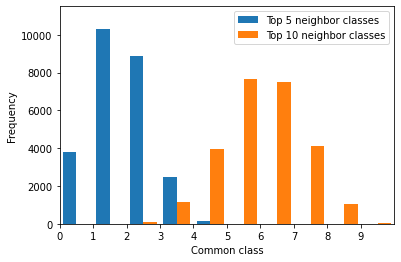

In [ ]:
#[Auixiliary data]: Comparison the output of NN and k-NN
import matplotlib.pyplot as plt
X=np.arange(0, n1, 1).tolist()
xlocs, xlabs = plt.xticks()
xlabs=[i for i in range(0,10)]
x_pos = [i for i, _ in enumerate(xlabs)] 
Y1=commonSize1
Y2=commonSize2
plt.hist([Y1,Y2])
plt.legend(['Top 5 neighbor classes','Top 10 neighbor classes'])
plt.ylabel('Frequency')
plt.xlabel('Common class')
plt.xlim(0,10)
plt.ylim(0,11500)
plt.xticks(x_pos, xlabs)
#legend = plt.legend(loc='best', shadow=True)
plt.show()

In [ ]:
#print some output
print(y22_train[0:5,0])
print(allSort2[0:5])

[14.  4. 13. 13.  1.]
[[14.  8. 11. 19. 16. 17. 10.  4. 15.  7.  9.  2. 12.  0.  1.  6.  3. 18.
   5. 13.]
 [ 4. 17. 16. 10.  7.  0.  9. 11.  5. 15. 12. 18.  3.  6.  1. 14.  2.  8.
  19. 13.]
 [13. 17. 11.  3. 16.  8.  0. 18. 19. 10.  4.  7. 15.  9.  2.  1.  5.  6.
  12. 14.]
 [13. 11. 18.  8. 17.  3.  0. 19.  4. 10. 15.  7. 16.  9.  1.  2.  6. 12.
   5. 14.]
 [ 1. 19. 17.  3.  4. 16. 11. 10.  7.  9.  5.  0. 18.  2. 15. 14. 12.  6.
   8. 13.]]


In [ ]:
#Take 4 neighbor of top-ranked class
for i in range(n1):
  y22_train[i][1]=allSort2[i][19]
  y22_train[i][2]=allSort2[i][18]
  y22_train[i][3]=allSort2[i][17]
  y22_train[i][4]=allSort2[i][16]


In [ ]:
#Fillup the table by 4 different probability based on neighborness
import numpy as np
import random

rank=5
n,m=X22_train.shape
X2_InvTrain = np.zeros([n, m], dtype=float)
for i in range(n):
 sumP=0
 start=0
 end=1
 for j in range(rank):
  if(j==0):
    X2_InvTrain[i,int(y22_train[i][j])]= X22_train[i, int(y22_train[i][j])]
    sumP+=X22_train[i, int(y22_train[i][j])]
  else:
    X2_InvTrain[i,int(y22_train[i][j])]=random.uniform(start, end)
    sumP+=X2_InvTrain[i,int(y22_train[i][j])]
    #print(X2_InvTrain[i,int(y22_train[i][j])])
  remaining=1-sumP
  #remaining=1-sum(X2_InvTrain[i])
  end=remaining
    #print(end)
  if(end >=0.1):
   start=end-0.1
  else:
   start=0
    #print(indx)
    
    #print(y1_Rand[i,indx])

In [ ]:
#print one of the probablity
print(X2_InvTrain[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.74989436e-10
 0.00000000e+00 1.05528785e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.33333472e-05 9.99936104e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.79433359e-09 0.00000000e+00]


In [ ]:
#Create a [inverse classifier]
def create_Invclassifier(Tuser=41):
  Invclassifier = Sequential()
  Invclassifier.add(Dense(64, input_dim=Tuser))
  Invclassifier.add(BatchNormalization())
  Invclassifier.add(Activation('tanh'))

  Invclassifier.add(Dense(128))
  Invclassifier.add(BatchNormalization())
  Invclassifier.add(Activation('tanh'))

  Invclassifier.add(Dense(256))
  Invclassifier.add(BatchNormalization())
  Invclassifier.add(Activation('tanh'))

  #Invclassifier.add(Dense(256))
  #Invclassifier.add(BatchNormalization())
  #Invclassifier.add(Activation('tanh'))

  Invclassifier.add(Dense(128))
  Invclassifier.add(BatchNormalization())
  Invclassifier.add(Activation('tanh'))

  Invclassifier.add(Dense(64))
  Invclassifier.add(BatchNormalization())
  Invclassifier.add(Activation('tanh'))

  Invclassifier.add(Dense(30,activation='sigmoid'))

  Invclassifier.compile(loss='mse', optimizer=adam_optimizer())
  return Invclassifier

InvClsf=create_Invclassifier()
InvClsf.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                2688      
_________________________________________________________________
batch_normalization_21 (Batc (None, 64)                256       
_________________________________________________________________
activation_21 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)              

In [ ]:
#Train the inverse classifier by using [auxilary profiles]
#Fist give the data to the classifier and then fillup its probablity 
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

InvClsfI1=create_Invclassifier(20)

#------Comment will start from here
lossc='mse'
optimizerc=RMSprop(lr=0.001, rho=0.9)
InvClsfI1.compile(loss=lossc, optimizer=optimizerc)
#------Comments will end from here
historyc3 =  InvClsfI1.fit(X2_InvTrain, X2_train, batch_size=64, epochs=50,verbose=1, callbacks=callbacks_list)

Epoch 1/50
25599/25599 [==============================] - 3s 108us/step - loss: 0.0246
Epoch 2/50
 2112/25599 [=>............................] - ETA: 1s - loss: 0.0118

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


25599/25599 [==============================] - 2s 79us/step - loss: 0.0117
Epoch 3/50
25599/25599 [==============================] - 2s 79us/step - loss: 0.0112
Epoch 4/50
25599/25599 [==============================] - 2s 80us/step - loss: 0.0110
Epoch 5/50
25599/25599 [==============================] - 2s 78us/step - loss: 0.0108
Epoch 6/50
25599/25599 [==============================] - 2s 79us/step - loss: 0.0106
Epoch 7/50
25599/25599 [==============================] - 2s 79us/step - loss: 0.0105
Epoch 8/50
25599/25599 [==============================] - 2s 78us/step - loss: 0.0104
Epoch 9/50
25599/25599 [==============================] - 2s 78us/step - loss: 0.0103
Epoch 10/50
25599/25599 [==============================] - 2s 79us/step - loss: 0.0102
Epoch 11/50
25599/25599 [==============================] - 2s 78us/step - loss: 0.0102
Epoch 12/50
25599/25599 [==============================] - 2s 78us/step - loss: 0.0101
Epoch 13/50
25599/25599 [==============================] - 2s 

Text(0.5, 0, 'epochs')

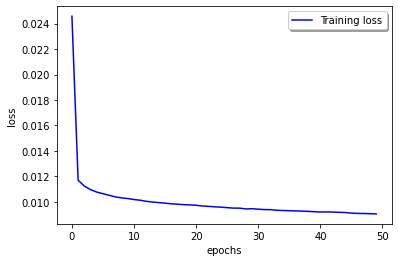

In [ ]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc3.history['loss'], color='b', label="Training loss")
#plt.plot(historyc3.history['val_loss'], color='r',label="Validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
#Calculate the distance among test data
from scipy.spatial import distance
import numpy
n1,m1=X2_train.shape
n2,m2=X2_test.shape

y2T=array(y2T)
y2Te=array(y2Te)
X2_train=array(X2_train)
X2_test=array(X2_test)
kNN=250
d=numpy.zeros((n2,n2))
for i in range(n2):
  for j in range(n2):
    d[i][j] = distance.euclidean(X2_test[i].astype(float), X2_test[j].astype(float))

In [ ]:
# writing to csv file  
with open('Data/allDistancesTestT.csv', 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)          
    # writing the data rows  
    csvwriter.writerows(d)

In [ ]:
#Calculate the neighbor of original class based on auxilary profile
from scipy.spatial import distance
import numpy as np
#encoded_train = encoder.predict(X2_train)
#encoded_test = encoder.predict(X2_test)

n1,m1=X2_train.shape
n2,m2=X2_test.shape

y2T=array(y2T)
y2Te=array(y2Te)
X2_train=array(X2_train)
X2_test=array(X2_test)
kNN=10
count=0;

#indx=2

allSort2=numpy.zeros((n1,20))

n1,m1=d.shape
unique_elements, counts_elements = np.unique(y2Te, return_counts=True)
RankDistance=numpy.zeros((unique_elements.size,unique_elements.size))
RankTable=numpy.zeros((unique_elements.size,unique_elements.size))

for classID1 in unique_elements:
   CID1index=numpy.zeros(counts_elements[classID1])
   n2=CID1index.size
   print(n2)
   indx=0
   for i in range(n1):
     if(y2Te[i]==classID1):
       CID1index[indx]=i
       indx=indx+1

   for classID2 in unique_elements:
     sumPUser=0
     #print(sumPUser)
     for eachIndx in range(n2):
       #print(CID1index[eachIndx])  
       ind=d[int(CID1index[eachIndx])].argsort() 
       sum1=0
       sum2=0 
       k=0 
       l=0 
       while (k<kNN and l<n2):
         if(y22_test[ind[l]]!=classID1 and y22_test[ind[l]]==classID2):
           #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
           d1 = d[int(CID1index[eachIndx])][ind[l]]
           #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
           sum1=sum1+np.exp(-d1)
           k=k+1
           l=l+1
         elif(y22_test[ind[l]]!=classID1) :
           #d = distance.euclidean(encoded_train[ind[k]], encoded_test[indx])
           d2 = d[int(CID1index[eachIndx])][ind[l]]
           #d = distance.euclidean(X2_train[ind[k]].astype(float), X2_test[indx].astype(float))
           sum2=sum2+np.exp(-d2)
           k=k+1
           l=l+1
         else:
           l=l+1
       
       sumPUser+= (sum1/(sum1+sum2))
       #print(sumPUser)
     #print(classID2)
     RankDistance[classID1][classID2]=sumPUser/n2
     #print(sumPUser/n2)
   RankTable[classID1]=RankDistance[classID1].argsort()

396
399
401
399
406
400
407
394
387
377
414
416
401
423
372
420
392
410
390
396


In [ ]:
#Print rank-table
print(RankTable)

[[ 0. 11. 13.  3.  8.  7. 18. 10. 14. 15. 12.  9.  4.  6. 19. 16.  1. 17.
   2.  5.]
 [ 1. 11. 17. 10.  9. 16. 18.  7. 15. 13.  4.  8.  2.  5.  3. 12. 14.  0.
  19.  6.]
 [ 2. 17. 11. 10.  9. 15. 16. 18.  0. 19.  3.  4.  5. 12.  7.  1.  8.  6.
  13. 14.]
 [ 3.  9. 10. 17. 11. 18. 16.  7. 15.  8.  4.  0.  2. 12.  5. 19. 13. 14.
   6.  1.]
 [ 4. 11. 15. 17. 16. 10.  9.  7. 12. 18.  8.  3. 13.  2.  5.  0. 14.  6.
  19.  1.]
 [ 5. 10. 11. 17.  9. 16. 15.  8. 18.  7.  4. 19.  2. 13.  0.  1. 12.  3.
  14.  6.]
 [ 6. 11. 10. 13.  3.  0. 14. 18.  9. 19. 15.  8. 16. 17.  7. 12.  4.  1.
   2.  5.]
 [ 7. 11. 10.  9. 18. 17.  8. 15. 16.  4. 13.  3.  2. 14. 12.  0. 19.  5.
   6.  1.]
 [ 8. 17. 10.  9. 16. 11.  0.  3. 18. 15.  2.  5. 19.  6.  1.  4. 12.  7.
  14. 13.]
 [ 9. 11. 10. 17. 16.  7. 15. 18.  5.  8.  4.  2. 12.  1. 19.  0. 13. 14.
   3.  6.]
 [10. 17.  9. 16. 18. 15. 11.  2. 19.  4.  0.  3. 12.  8.  7.  5.  1.  6.
  14. 13.]
 [11. 10. 13.  9.  3.  0. 17.  5.  7.  1. 16. 14. 18. 15.  8.  2.

In [ ]:
#Random generation of input for inverse classifier
import numpy as np
rank=5
y22_train=Classfier2.predict(X1_train)
y22_train=array(y22_train)
n,m=y22_train.shape
y1_Rand = np.zeros([n, m], dtype=float)

for i in range(n):
 ind=y22_train[i].argsort()[-rank:][::-1]
 start=0.98
 end=1.0
 sumP=0
 for j in range(rank):
  if(j==0):
    np.put(y1_Rand[i], ind[0], random.uniform(start, end))
    sumP+=y1_Rand[i,ind[0]]
    #print(y1_Rand[i])
  else:
    indx=int(RankTable[ind[0],20-j])
    y1_Rand[i,indx]=random.uniform(start, end)
    sumP+=y1_Rand[i,indx]
  remaining=1-sumP
  end=remaining
  #print(end)
  if(end >=0.1):
   start=end-0.1
  else:
   start=0

In [ ]:
#print random generated input
print(y1_Rand[0])

[0.00000000e+00 1.92516372e-04 9.93890884e-01 0.00000000e+00
 3.36459312e-06 1.87430482e-06 5.21986316e-05 7.27826071e-05
 1.87118936e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.74315001e-06 5.93957893e-05 5.52759932e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [ ]:
#Calculate the accuracy of data generated by inverse classifier
#Input random generated probablity input to inverse classifier to get data sample
#Input those data samples to the classifier
X1_Rand=InvClsfI1.predict(y1_Rand)
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(X1_Rand, y1_train)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

25599/25599 [==============================] - 1s 51us/step
Loss: 7.449219951415799
Accuracy: 0.2577444314956665


In [ ]:
from sklearn.metrics import classification_report

Y_train = np.argmax(y1_train, axis=1)
y_pred=Classfier2.predict_classes(X1_Rand)
#print(keras.metrics.categorical_accuracy(y1_train, y_pred))
allResult=classification_report(Y_train, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import ast
print(allResult)

              precision    recall  f1-score   support

           0       0.33      0.52      0.40      1258
           1       0.53      0.54      0.54      1287
           2       0.35      0.88      0.50      1282
           3       0.27      0.00      0.01      1293
           4       0.58      0.21      0.31      1306
           5       0.25      0.99      0.40      1280
           6       0.78      0.98      0.87      1303
           7       0.46      0.93      0.61      1296
           8       0.96      0.88      0.92      1286
           9       0.12      0.10      0.11      1300
          10       0.00      0.00      0.00      1249
          11       0.00      0.00      0.00      1248
          12       1.00      0.00      0.00      1281
          13       0.97      1.00      0.98      1240
          14       0.97      0.97      0.97      1298
          15       0.80      0.63      0.71      1290
          16       0.11      0.02      0.03      1270
          17       0.67    

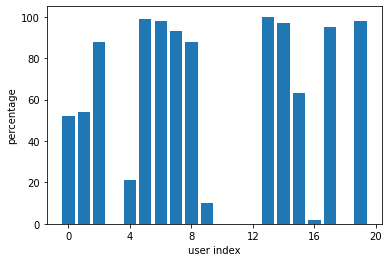

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_axes([0,0,10,1])
listu=np.arange(0, 20, 1).tolist()
accept = [0.52,0.54,0.88,0.00,0.21,0.99,0.98,0.93,0.88,0.10,0.00,0.00,0.00,1.00,0.97,0.63,0.02,0.95, 0.00,0.98] 
accept=np.array(accept) 
accept=100 *accept         
plt.bar(listu,accept)
plt.ylabel('percentage')
plt.xlabel('user index')
plt.xticks(range(0, 21,4))
plt.show()